# Which Kardashian/Jenner sister is the most famous ?  - Google Search Trends Analysis

The Kardashian/Jenner clan are sisters who have gained fame and success in various industries. The sisters include Kourtney, Kim, Khloe, Kendall, and Kylie. They first rose to fame through their reality TV show, "Keeping Up with the Kardashians," which premiered in 2007 and has since become one of the longest-running reality TV shows in history.

<p><img src="https://images.ctfassets.net/iyiurthvosft/3m77F6haKwcXqNoKExLISu/fe04d04b910d06269a93dba967d91d3d/Kardashian_Jenner_Family.jpg?fm=jpg&fl=progressive&q=50&w=1200" alt="Kardashian Jenner family"></p> 

- **Kim Kardashian**: known for her successful career in the entertainment industry, including her reality TV show, her various business ventures, and her social media presence. She is also known for her role as a legal advocate and her work to reform the criminal justice system.

- **Kourtney Kardashian**: known for her minimalistic lifestyle and her focus on health and wellness. She is also known for her various business ventures and her social media presence.

- **Khloe Kardashian**: known for her successful career as a television personality and her work as a fitness and lifestyle influencer. She is also known for her role as a legal advocate and her work to reform the criminal justice system.

- **Kendall Jenner**: a successful model, who has walked in various fashion shows and has modeled for some of the most famous fashion brands in the world. She is also known for her work as a television personality and her social media presence.

- **Kylie Jenner**: a businesswoman and social media influencer, she founded Kylie Cosmetics, which became one of the most successful makeup companies in the world. She is also known for her successful career as a television personality.

The Kardashian/Jenner sisters have become household names and have a significant influence in the entertainment industry and the fashion world. They are known for their unique personalities, their business acumen, and their ability to adapt to changing trends and technologies.


In [193]:
#Libraries 
import pandas as pd
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import HoverTool, Legend, LegendItem
from bokeh.palettes import Set1, Bokeh
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# Read in dataset
trends = pd.read_csv('datasets/google_trends_kardashian_jenner.csv', skiprows=1)
trends.head()

,Mois,Kim Kardashian: (Dans tous les pays),Khloé Kardashian: (Dans tous les pays),Kourtney Kardashian: (Dans tous les pays),Kendall Jenner: (Dans tous les pays),Kylie Jenner: (Dans tous les pays)
0,2007-01,3,< 1,< 1,< 1,1
1,2007-02,13,< 1,< 1,< 1,1
2,2007-03,9,< 1,< 1,< 1,1
3,2007-04,6,< 1,< 1,< 1,1
4,2007-05,6,< 1,< 1,< 1,1


## Data Cleaning

In [6]:
trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Mois                                       193 non-null    object
 1   Kim Kardashian: (Dans tous les pays)       193 non-null    int64 
 2   Khloé Kardashian: (Dans tous les pays)     193 non-null    object
 3   Kourtney Kardashian: (Dans tous les pays)  193 non-null    object
 4   Kendall Jenner: (Dans tous les pays)       193 non-null    object
 5   Kylie Jenner: (Dans tous les pays)         193 non-null    object
dtypes: int64(1), object(5)
memory usage: 9.2+ KB


In [7]:
# Rename the columns
trends.columns = ["month", "kim", "khloe", "kourtney", "kendall", "kylie"]

In [8]:
# Remove spaces and special characters
for column in trends.columns:
    if "<" in trends[column].to_string(): 
        trends[column] = trends[column].str.replace("<", "").str.strip()
        trends[column] = pd.to_numeric(trends[column])

# Convert month and set index
trends['month'] = pd.to_datetime(trends['month'])
trends = trends.set_index('month')

# Inspect data types and data
trends.info()
trends.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 193 entries, 2007-01-01 to 2023-01-01
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kim       193 non-null    int64
 1   khloe     193 non-null    int64
 2   kourtney  193 non-null    int64
 3   kendall   193 non-null    int64
 4   kylie     193 non-null    int64
dtypes: int64(5)
memory usage: 9.0 KB


,kim,khloe,kourtney,kendall,kylie
month,,,,,
2007-01-01,3,1,1,1,1
2007-02-01,13,1,1,1,1
2007-03-01,9,1,1,1,1
2007-04-01,6,1,1,1,1
2007-05-01,6,1,1,1,1


## Data Visualization

In [9]:
output_notebook()

Loading BokehJS ...

In [195]:
# Figure params
p = figure(title="Google trends for the Kardashian/Jenner family", 
            y_axis_label = 'Google Trends Score',
            sizing_mode="stretch_width",
            height=400, 
            x_axis_type="datetime",
            tools=[HoverTool()], 
            tooltips="Score:@y"
            )

# Plot a line for each sister
for sister, color in zip(["kim", "khloe", "kourtney", "kendall", "kylie"], Bokeh[5]):
    p.line(trends.index, trends[sister], line_width=2, color=color, alpha=0.8, legend_label=sister)
    
show(p)

In [194]:
trends_annual_rolling =  trends.resample('Y').sum()

# Figure params
q = figure(title="Google trends for the Kardashian/Jenner family", 
            y_axis_label = 'Google Trends Score',
            sizing_mode="stretch_width",
            height=400, 
            x_axis_type="datetime",
            tools=[HoverTool()], 
            tooltips="Score:@y"
            )
            
# Plot a line for each sister
for sister, color in zip(["kim", "khloe", "kourtney", "kendall", "kylie"],  Bokeh[5]):
    q.line(trends_annual_rolling.index, trends_annual_rolling[sister], line_width=2, color=color, alpha=0.8, legend_label=sister)

show(q)

In [48]:
average_per_year = trends.groupby(trends.index.year).sum()
average_per_year = average_per_year.loc['2007':'2022', :]
average_per_year.reset_index(inplace=True)

average_per_year = average_per_year.melt(id_vars=["month"], 
        var_name="Sister", 
        value_name="Mean")

# Add a rank column
average_per_year["rank"] = average_per_year.groupby("month")["Mean"].rank(method="dense", ascending=False)

In [180]:
fig = px.bar(average_per_year, x='Sister', y='Mean',
            text='rank', 
             color='Sister',
             animation_frame='month', 
             color_discrete_sequence=px.colors.sequential.Pinkyl_r,
             labels={
                     "Mean": "Sum of Interest Score",
                     "Sister": ""
                 }
            )
fig.update_yaxes(showgrid=False, categoryorder='total ascending', 
                 ticksuffix=' ', showline=False)
fig.update_layout(width=1000, height=600, showlegend=False,
                  xaxis = dict(tickmode = 'linear', dtick = 1), 
                  plot_bgcolor = '#fff')
fig.update_traces(textfont_size=16, textangle=0)
fig.show()

In [187]:
px.colors.sequential.Pinkyl_r[0:5]

['rgb(225, 83, 131)',
 'rgb(241, 109, 122)',
 'rgb(250, 138, 118)',
 'rgb(255, 166, 121)',
 'rgb(255, 194, 133)']

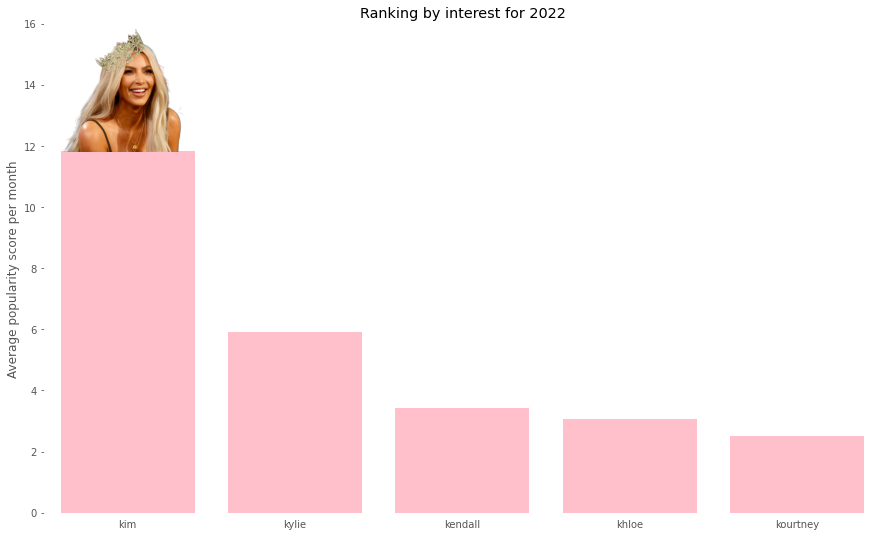

In [189]:
average_per_month = trends.loc['2022-01-01':'2022-12-31', :]
average_per_month = average_per_month.groupby(average_per_month.index.day).mean()
average_per_month.reset_index(inplace=True)
average_per_month = average_per_month.melt(id_vars=['month'], 
                        value_vars=['kim', "khloe", "kourtney", "kendall", "kylie"], 
                        var_name='name', value_name='annual_mean')
average_per_month = average_per_month.sort_values('annual_mean', ascending = False)

#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 9]
ax = plt.axes()
ax.set_facecolor("white")
#average_per_month.plot(kind='barh')

average_per_month.head()
#plt.barh(data=average_per_month, y='Mean', width=values, height=height, color=colors, align='center')
#plt.bar(range(len(average_per_month)), sorted(average_per_month), color='red', alpha=0.5)


plt.bar(average_per_month['name'], average_per_month['annual_mean'], color = 'pink')
#plt.show()
#plt.bar(range(len(average_per_month)), sorted(average_per_month), color='red', alpha=0.5)

img = plt.imread('img/kimk.png')
plt.imshow(img, extent=[-0.5, 0.6, 11.8, 15.8], aspect='auto', zorder=2)
plt.ylim(0, 16)
plt.xlim(-0.5, 4.5)
plt.grid(False)
plt.ylabel('Average popularity score per month')
plt.title('Ranking by interest for 2022')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False)